In [1]:
%pylab inline
import matplotlib.pyplot as plt
from scipy import stats

from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

import theano
import theano.printing as TP
from IPython.display import SVG
def svgdotprint(g):
    return SVG(theano.printing.pydotprint(g, return_image=True, format='svg'))
import time

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 14 days


Populating the interactive namespace from numpy and matplotlib


ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.


In [2]:
def discrete_prob(arr):
    r = random.rand()
    cdf = 0
    for i in arange(len(arr)):
        cdf = cdf + arr[i]
        if cdf > r:
            return i
    return len(arr) -1

def generate_bank_accounts(n, start = 0): 
    x = arange(n) + start
    random.shuffle(x)
    return x

def random_hour(n, center = 16., scale = 3, u_rate = 0.2):
    n_norm = floor(n * (1 - u_rate));
    u = array(uniform(0, 24, n - n_norm))
    norm = array(random.normal(center, scale, n_norm))
    return concatenate((norm % 24, u))

def transfer_matrix(arr, p = 0.8, n = 10):
    div = n*(n+1)/2;
    
    matrix = np.copy(arr)
    random.shuffle(matrix)

    for i in arange(n-1):
        nrow = np.copy(arr)
        random.shuffle(nrow)
        matrix = vstack((nrow, matrix))
        
    matrix = vstack((arr, matrix))
    desc = np.reshape(insert(((arange(n)+1)*p/div)[::-1], 0, 1-p), (n+1, 1))
    
    return hstack((desc, matrix))
    
def monetize(n, center = 300, shape=2):    
    return random.gamma(shape, center, n)

def make_random_transactions(accounts_num ,samples_num, susp = None):
    
    accounts = generate_bank_accounts(accounts_num)
    t_m = transfer_matrix(accounts)
    
    probs = t_m[:,0]
    t_m = t_m[:,1:].astype(int)
    
    
    if susp == None:
        susp = genereate_suspects(accounts)
    
    transactions = []
    is_legit = [False, -1]
    p = np.random.randint(accounts_num, size=samples_num)
    print "a_n: ", t_m.shape[1], "s_n: ", samples_num
    for i in p:
        
        idx = discrete_prob(probs)
        fr = t_m[0][i]
        to = t_m[idx,i]
        while to == fr:
            to = t_m[0][random.randint(accounts_num)]
        
        if to in susp:
            is_legit = vstack(([False, 1], is_legit))
        else:
            is_legit = vstack(([True, 0], is_legit))
            
        if transactions == []:
            transactions = [fr, to]
        else:
            transactions = vstack(([fr, to], transactions))
        
    
    hours = reshape(random_hour(samples_num), (samples_num, 1))
    monets = reshape(monetize(samples_num), (samples_num, 1))
    
    transactions = hstack((transactions, hours))
    transactions = hstack((transactions, monets))
    transactions = hstack((transactions, is_legit[:is_legit.shape[0]-1]))
        
    return transactions, probs, accounts, susp, t_m
        
        
def genereate_cracs(accounts, cracs_num):
    freud = []
    f_desc = dict()
    for victim in random.choice(accounts, cracs_num):
        n = random.randint(5, 15)
        h = reshape(random_hour(n, random.randint(4, 23), 0.1, 0), (n, 1))
        m = reshape(monetize(n), (n, 1))
        c = reshape(random.choice(accounts, n), (n, 1))
        d = np.zeros((n, 1)) + 2 
        
        while victim in c:
            c = reshape(random.choice(accounts, n), (n, 1))
        
        n_freud = hstack((ones((n, 1)) *victim, c, h, m, ones((n, 1)) == 0, d))
        if freud == []:
            freud = n_freud
        else:
            freud = vstack((n_freud, freud))
        f_desc[victim] = hstack((c, h))

    return freud, f_desc
    
def genereate_suspects(accounts, susp= 1000):
    suspects = random.choice(accounts, susp)
    return suspects
    
    

def print_hist(x, b= 10, label = "default"):
    hist, bins = np.histogram(x, bins=b)
    center = (bins[:-1] + bins[1:]) / 2
    w = 1.*(amax(x) - amin(x))/b
    
    plt.bar(center, hist, align='center', width=w)
    plt.title(label)
    plt.show()

a_n:  10000 s_n:  100000


/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


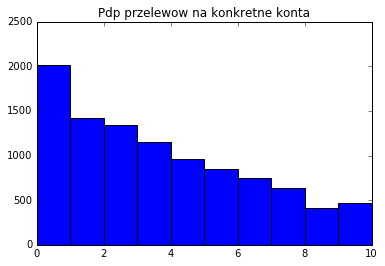

In [4]:
trans_i, probs, acc, susp, t_matrix = make_random_transactions(10000, 100000)

x = array([])

for i in arange(10000):
    x = append(x, discrete_prob(probs))
print_hist(x, label="Pdp przelewow na konkretne konta")

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:99: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


(100000, 6) (9585, 6)
(109585, 6)
[[  7.32700000e+03   5.69000000e+03   1.99370681e+01   1.38061495e+03
    0.00000000e+00   2.00000000e+00]
 [  7.32700000e+03   8.38600000e+03   2.00490053e+01   7.39824417e+01
    0.00000000e+00   2.00000000e+00]
 [  7.32700000e+03   6.61300000e+03   1.99233943e+01   1.10747635e+03
    0.00000000e+00   2.00000000e+00]
 ..., 
 [  8.44400000e+03   5.52600000e+03   1.20369271e+01   4.16677299e+02
    1.00000000e+00   0.00000000e+00]
 [  9.62000000e+03   8.22200000e+03   9.16110605e+00   6.73503823e+02
    0.00000000e+00   1.00000000e+00]
 [  9.01800000e+03   7.57800000e+03   2.31710713e+01   2.81671216e+01
    1.00000000e+00   0.00000000e+00]]


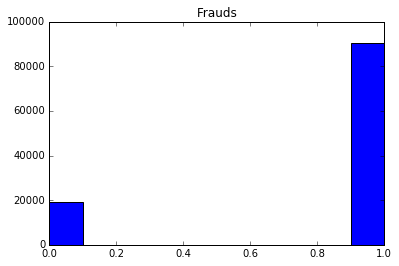

In [5]:
cracs, f_desc = genereate_cracs(acc, 1000)

print trans_i.shape, cracs.shape
trans_c = array(vstack((cracs, trans_i)))
print trans_c.shape

print trans_c
print_hist(trans_c[:, 4], label="Frauds")

(60000, 6) (49585, 6)


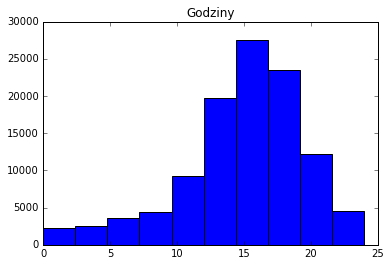

In [7]:
import pandas as pd

trans_c = array(trans_c)
np.random.shuffle(trans_c)
trans = pd.DataFrame.from_items([('from', trans_c[:,0].astype('i4')), ('to', trans_c[:,1].astype('i4')), 
                                ('time', trans_c[:,2].astype('f4')), ('money', trans_c[:,3].astype('f4')), 
                                ('valid', trans_c[:,4].astype('b1')), ('desc_', trans_c[:,5].astype('i4'))])


train_set = trans[:60000]
test_set = trans[60000:]

print train_set.shape, test_set.shape
print_hist(trans_c[:, 2], label="Godziny")

723 20


/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


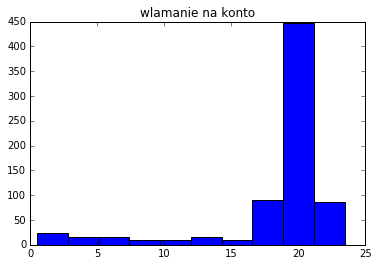

In [8]:
n = random.randint(500, 1500)
c = random.randint(0, 23)
print n, c

print_hist(random_hour(n, c, 1), label="wlamanie na konto")

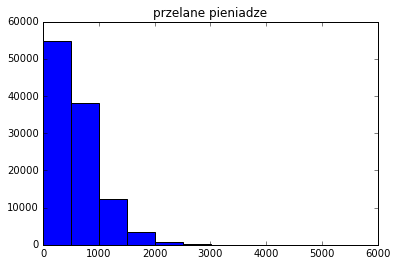

In [10]:
print_hist(trans_c[:, 3], label="przelane pieniadze")

In [77]:
class Transaction():
    def __init__(self, n_account, time):
        self.n_account = n_account
        self.time = time

class Account():
    def __init__(self, number, out_t, in_t):
        self.in_trans = in_t
        self.out_trans = out_t
        self.number = number
        
    def __str__(self):
        return "To: \n" + self.in_trans.__str__ () + "\nFrom: \n" +self.out_trans.__str__ ()
    
    def isVictim(self, acc, v_p = 5):
        t = self.out_trans[~self.out_trans['to'].isin(acc)]
        if t[t['valid'] == False].count()[0] > v_p:
            return True
        return False
        
    def is_crack(self):
        if self.in_trans['valid'].mean() == 0:
            return True
        return False
    
    def check(self, f, p=False):
        if p:
            print self.out_trans
        t = self.out_trans[~self.out_trans['to'].isin(f)]
        t = t[t['valid'] == False]
        if p:
            print t
        return t['time'].std()
    
    def removeByhour(self, t):
        m = t.mean()
        s = t.std()
        return t[(t['time'] > s - m)  and t['time'] < s + m ]
    
    def get_in(self):
        return self.in_trans
    
    def get_out(self):
        return self.out_trans
    
    def get_number(self):
        return self.number
        
def makeAccounts(trans):
    account = dict()
    for i in arange(10000):
        account[i] = Account(i, 
                             trans[trans['from'] == i], 
                             trans[trans['to'] == i])
    return account

In [78]:
accounts = makeAccounts(train_set)

In [141]:
def train(train_set, accounts):
    t_mean = train_set['time'].mean()
    t_std = train_set['time'].std()
    
    susp = set()
    stds = array([])
    for i in accounts.keys():
        a = accounts[i]
        if(a.is_crack()):
            susp.add(a.get_number())
            
    print len(susp)
    for i in accounts.keys():
        a = accounts[i]
        if(a.isVictim(susp)):
            std = a.check(susp)
            if isnan(std):
                print a
            stds = insert(stds, 0, std)
    return list(susp), stds

def checkSusp(susp, p = False):
    corr = 0
    for a in susp:
        if 1 in accounts[a].get_in()['desc_'].unique():
            corr = corr +1
        elif p:
            print accounts[a]
    return len(susp), corr            

def find_frauds(accounts, susp, p_s, seprete = False):
    by_susp = set()
    brake_in = set()
    for i in accounts.keys():
        a = accounts[i]
        if i in susp:
            by_susp = by_susp.union(a.get_in().index)
        if a.isVictim(susp) :
            i = a.get_out()
            t = i.iloc[array([i[(i['time'] < t + p_s) & (i['time'] > t - p_s)].count()[0] for t in i['time']]).argmax()]['time']
            brake_in = brake_in.union(i[(i['time'] < t + p_s) & (i['time'] > t - p_s)].index)
    if seprete:
        return by_susp, brake_in
    else:
        return by_susp.union(brake_in)
            
    
def predict(susp, std, trans_set):
    a = makeAccounts(trans_set)
    f_s, f_b = find_frauds(a, susp, std_param, True)
    return f_s, f_b, a
    
def printResult(i_set, frauds):
    f = set(i_set[i_set['valid'] == False].index)
    uf = set(i_set[i_set['valid'] == True].index)
    poss_c = len(f.intersection(frauds))
    poss_f = len(f.difference(frauds))
    neg_c = len(uf.difference(frauds))
    neg_f = len(uf.intersection(frauds))
    print 'Liczba wszsytkich transakcji: ', len(i_set)
    print 'Liczba rzeczywistych oszustw: ', len(f)
    print 'Liczba swierdzonych oszustw: ', len(frauds)
    print len(f.intersection(frauds))/ float(len(f)) * 100, "% - procent poprawnie przwidzianych oszustw"
    print 100 - len(f.intersection(frauds))/ float(len(f)) * 100, "% - procent blednie przwidzianych oszustw"
    print len(uf.difference(frauds))/ float(len(uf)) * 100, "% - procent przewidzianych poprawnych transakcji"
    print (len(uf.difference(frauds)) + len(f.intersection(frauds))) / float(len(f) + len( uf)) * 100, "% - POPRAWNOSC"
    return poss_c, poss_f, neg_c, neg_f

def printBar(pair1, pair2, legends=None, labels=None, title=""):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    idx = arange(len(pair1))*4
    b1 = ax.bar(idx, pair1, width=1, color='g')
    b2 = ax.bar(idx+1, pair2,  width=1, color='b')
    if labels != None: 
        ax.legend( (b1[0], b2[0]), legends )
    if labels != None: 
        ax.set_xticks(idx+1)
        ax.set_xticklabels(labels)
    ax.set_title(title)


    plt.show()

In [85]:
susp, stds = train(train_set, accounts)

std_param = stds.mean()

944


In [91]:
by_s, by_b = find_frauds(accounts, susp, std_param, True)
print len(by_s), len(by_b), len(by_s.union(by_b))
frauds = by_s.union(by_b)
f_s, f_b, a = predict(susp, std_param, test_set)

5612 2873 8295


In [142]:
print "TRAIN SET"
train_poss_c, train_poss_f, train_neg_c, train_neg_f = printResult(train_set, frauds)
print "TEST_SET"
test_poss_c, test_poss_f, test_neg_c, test_neg_f = printResult(test_set, f_s.union(f_b))

TRAIN SET
Liczba wszsytkich transakcji:  60000
Liczba rzeczywistych oszustw:  10377
Liczba swierdzonych oszustw:  8295
78.5390768045 % - procent poprawnie przwidzianych oszustw
21.4609231955 % - procent blednie przwidzianych oszustw
99.7077967878 % - procent przewidzianych poprawnych transakcji
96.0466666667 % - POPRAWNOSC
TEST_SET
Liczba wszsytkich transakcji:  49585
Liczba rzeczywistych oszustw:  8653
Liczba swierdzonych oszustw:  6315
71.9865942448 % - procent poprawnie przwidzianych oszustw
28.0134057552 % - procent blednie przwidzianych oszustw
99.7898954363 % - procent przewidzianych poprawnych transakcji
94.9379852778 % - POPRAWNOSC


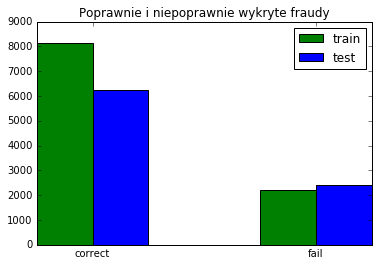

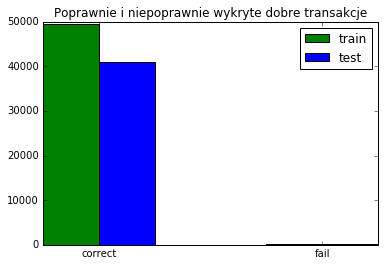

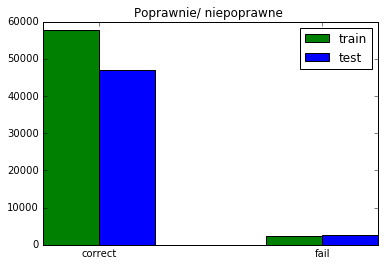

In [140]:
printBar([train_poss_c, train_poss_f],  [test_poss_c, test_poss_f], 
         legends = ('train', 'test'), 
         labels = ['correct', 'fail'], 
         title="Poprawnie i niepoprawnie wykryte fraudy")
printBar([train_neg_c, train_neg_f],  [test_neg_c, test_neg_f], 
         legends = ('train', 'test'), 
         labels = ['correct', 'fail'], 
         title="Poprawnie i niepoprawnie wykryte dobre transakcje")
printBar([train_poss_c + train_neg_c, train_poss_f + train_neg_f],  
         [test_poss_c + test_neg_c, test_poss_f + test_neg_f], 
         legends = ('train', 'test'), 
         labels = ['correct', 'fail'], 
         title="Poprawnie/ niepoprawne ")